In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Layer, Conv2D, Activation, Dense, Flatten
from matplotlib import pyplot as plt
from PIL import Image

## Classes


In [2]:
csv_file= pd.read_csv('labels.csv')
csv_file

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


## Loading dataset

In [10]:
## download dataset --> loop through it extract each class
## get images and assign it to train or test 
## get lables and assign it to train or test 
path = "E:/deep learning/TraficSignClassification/myData"
df =[]
for directory in os.listdir('myData'):
    for filename in os.listdir(os.path.join(path, directory)):
        image_path = os.path.join(path, directory, filename)
        element = (image_path, directory)
        df.append(element)
    #all images from same directory and category
    # dataset fomration ==> (image path, labels = directory)
   
        
        

In [9]:
len(df)
#image_path

73139

## convert our list dataset into tensor

In [181]:
dataset = tf.data.experimental.from_list(df)
#dataset = tf.data.Dataset.from_tensor_slices(df)

In [182]:
#dataset
dataset

<_ListDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [183]:
sample = dataset.as_numpy_iterator().next()

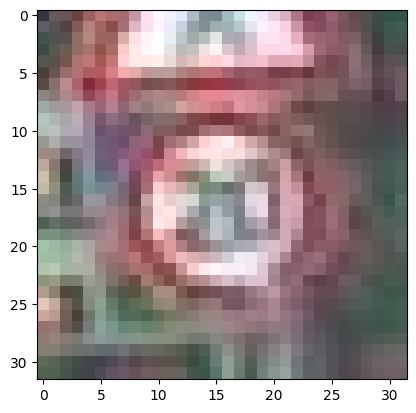

In [120]:
img = Image.open(sample[0])
plt.imshow(img)

## preprocess

In [3]:
def preprocess(filepath, label):
    byte_image = tf.io.read_file(filepath)
    img = tf.io.decode_jpeg(byte_image)
    img /= 255
    return (img, label)

In [4]:
## a function for resizong images 
def resize(image_path):
    # Open the image
   image = Image.open(image_path)
   # Set the desired width and calculate the corresponding height
   desired_width = 32
   width, height = image.size
   desired_height = int((height / width) * desired_width)

   # Resize the image
   resized_image = image.resize((desired_width, desired_height))

   # Save the resized image
   resized_image.save("resized_image.jpg")

In [185]:
data = dataset.map(preprocess)
data

<_MapDataset element_spec=(TensorSpec(shape=(None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

## shuffle our data


In [186]:
dataset = dataset.map(preprocess)
dataset = dataset.cache()
dataset = dataset.shuffle(buffer_size = 73139)

## Making train and test set partitions

In [245]:
#take 80% of total data for train
train_data = dataset.take(round(len(dataset)*.8))


In [244]:
test_data = dataset.skip(round(len(dataset)*.8))
test_data = test_data.take(round(len(dataset)*.2))


In [202]:
train_data

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [190]:
test_data

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [229]:
## loop through our train data and split the Label from images and store them in Y_train
X_train = []
Y_train = []
for x, y in train_data:
    X_train.append(x)
    Y_train.append(y)


In [238]:
#convert them into tensors
x_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(Y_train)
y_train = tf.strings.to_number(y_train, out_type=tf.float32)

## Create our nueral network

In [241]:
model = Sequential()
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(43, activation = 'softmax'))
model.compile(optimizer ='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 43)                5547      
                                                                 
Total params: 415403 (1.58 MB)
Trainable params: 415403 (1.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train model



In [243]:
model.fit(x_train, y_train, batch_size =16, epochs=10 )

Epoch 1/10
3657/3657 [==============================] - 29s 8ms/step - loss: 0.2773 - accuracy: 0.9196
Epoch 2/10
3657/3657 [==============================] - 29s 8ms/step - loss: 0.2539 - accuracy: 0.9266
Epoch 3/10
3657/3657 [==============================] - 29s 8ms/step - loss: 0.2324 - accuracy: 0.9322
Epoch 4/10
3657/3657 [==============================] - 29s 8ms/step - loss: 0.2105 - accuracy: 0.9386
Epoch 5/10
3657/3657 [==============================] - 29s 8ms/step - loss: 0.1989 - accuracy: 0.9422
Epoch 6/10
3657/3657 [==============================] - 29s 8ms/step - loss: 0.1881 - accuracy: 0.9457
Epoch 7/10
3657/3657 [==============================] - 29s 8ms/step - loss: 0.1809 - accuracy: 0.9467
Epoch 8/10
3657/3657 [==============================] - 29s 8ms/step - loss: 0.1687 - accuracy: 0.9502
Epoch 9/10
3657/3657 [==============================] - 29s 8ms/step - loss: 0.1696 - accuracy: 0.9500
Epoch 10/10
3657/3657 [==============================] - 29s 8ms/step - l

### Test model

In [250]:
## loop through our test data and split the Label from images and store them in Y-test
X_test = []
Y_test = []
for x, y in test_data:
    X_test.append(x)
    Y_test.append(y)

#convert the label into tensors
x_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(Y_test)
y_test = tf.strings.to_number(y_test, out_type=tf.float32)

In [252]:


# Evaluate the model on the test data
results = model.evaluate(x_test, y_test)

# Print the evaluation results
print('Loss:', results[0])
print('Accuracy:', results[1])

458/458 [==============================] - 7s 14ms/step - loss: 0.2064 - accuracy: 0.9429
Loss: 0.20636692643165588
Accuracy: 0.9429177045822144


### Save the Model

In [253]:
model.save("E:\deep learning\TraficSignClassification\model")

INFO:tensorflow:Assets written to: E:\deep learning\TraficSignClassification\model\assets


INFO:tensorflow:Assets written to: E:\deep learning\TraficSignClassification\model\assets


### Load model


In [5]:
model = tf.keras.models.load_model("E:\deep learning\TraficSignClassification\model")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 43)                5547      
                                                                 
Total params: 415403 (1.58 MB)
Trainable params: 415403 (1.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Test our model with our data

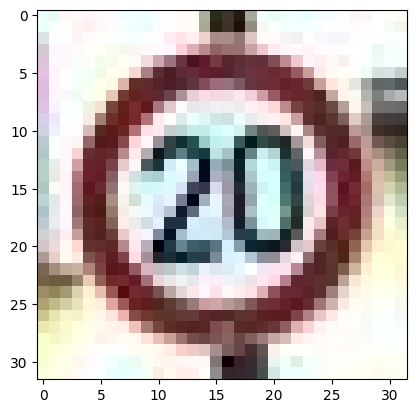

In [7]:
img = Image.open(df[200][0])
plt.imshow(img)

In [6]:
### Create a function for predicting our images
def predict_image(filepath):
    #passing an image to preprocess func to get ready for predictin
    img = preprocess(filepath,_)
    img = img[0]
    img = np.expand_dims(img, axis=0)
    #print(img.shape)
    #make prediciton
    res = model.predict(img)
    indx = np.argmax(res)
    res = (f"{classes[indx]} Sign")
    return res

In [7]:
##extract all class
classes = csv_file['Name']

In [51]:
predict_image(df[200][0])

(1, 32, 32, 3)
1/1 [==============================] - 0s 15ms/step
The Image is probably ' Speed limit (20km/h) ' Sign


##### Another image

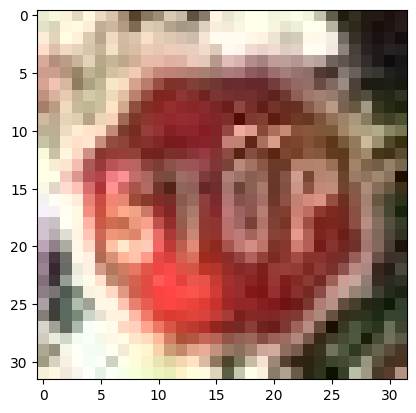

In [11]:
#Stop sign
img = Image.open(df[19759][0])
plt.imshow(img)

In [12]:
predict_image(df[19759][0])


1/1 [==============================] - 0s 87ms/step


'Stop Sign'

### Lets try our sample data form streets


In [36]:
## We should consider this that this data comes from different distrebution, So it means we are going to see more wrong prediction
labels = []
image_list =[]
path = "E:/deep learning/TraficSignClassification/images"
#loop through images folder
for filename in os.listdir('images'):
    image_path = os.path.join(path, filename)
    
    #read the path and open image
    img = Image.open(image_path)

    #predict out image and add result to label list 
    res = predict_image(image_path)
    labels.append(res)
    #add image to list
    image_list.append(img)


1/1 [==============================] - 0s 15ms/step


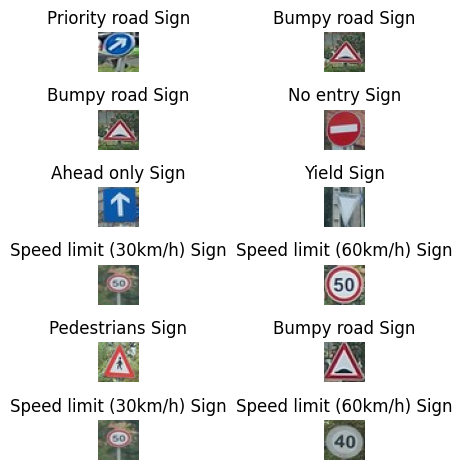

In [37]:
# Create the figure and subplots
fig, axes = plt.subplots(6, 2)

# Iterate through the axes and plot each image
for i, ax in enumerate(axes.flat):
    if i < len(image_list):
        ax.imshow(image_list[i])
        ax.axis('off')
        ax.set_title(labels[i])
# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()